<a href="https://colab.research.google.com/github/salamamohammedawad1986/Chatbot/blob/main/LinearReg_salary_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
from  sklearn import  *
import matplotlib.pyplot as plt
import tensorflow as tf
from warnings import filterwarnings
import seaborn as sns
from  keras.models import Sequential
from keras.layers import Dense
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

filterwarnings(action='ignore')

In [47]:
sns.set()
tf.random.set_seed(66)

In [8]:
df= pd.read_csv('salary.csv', sep=',')

In [9]:
df.isna().sum()

first_name    0
last_name     0
team          0
salary        0
pos           0
age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg%           0
3p            0
3pa           0
3p%           0
2p            0
2pa           0
2p%           0
efg%          0
ft            0
fta           0
ft%           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
dtype: int64

In [26]:
col = [ i for i in df.columns]

In [30]:
col[0:2].pop()

'last_name'

In [38]:
col

['team',
 'salary',
 'pos',
 'age',
 'g',
 'gs',
 'mp',
 'fg',
 'fga',
 'fg%',
 '3p',
 '3pa',
 '3p%',
 '2p',
 '2pa',
 '2p%',
 'efg%',
 'ft',
 'fta',
 'ft%',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts']

In [40]:
data = df[col]

In [41]:
data.head()

,team,salary,pos,age,g,gs,mp,fg,fga,fg%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,...,0.595,146,327,473,82,37,41,84,151,664
1,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,...,0.753,137,427,564,190,80,44,148,171,1068
2,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,...,0.873,73,185,258,42,14,47,44,78,607
3,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,...,0.865,32,190,222,100,46,18,43,96,733
4,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,...,0.708,192,410,602,92,44,75,94,97,904


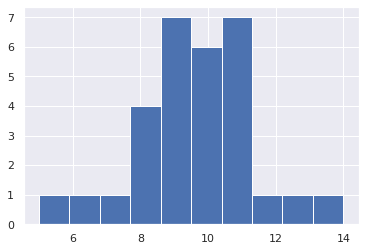

In [48]:
data['team'].value_counts().hist()

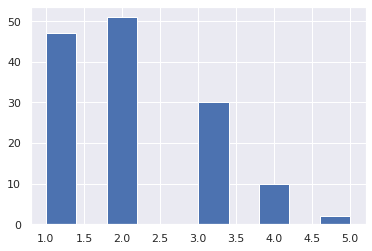

In [56]:
data.groupby(['pos','team'])['salary'].count().hist()

In [57]:
data.groupby(['pos','team'])['salary'].count()

pos  team
C    ATL     2
     BOS     2
     BRK     1
     CHI     2
     CHO     2
            ..
SG   SAC     1
     SAS     3
     TOR     1
     UTA     3
     WAS     2
Name: salary, Length: 140, dtype: int64

In [59]:
team_ = df.groupby('team')
for teams, fram in team_:
  print(f'{teams!r}')
  print(f'{fram.head(5)}')


'ATL'
    first_name  last_name team      salary pos  age   g  gs    mp   fg  ...  \
51       Clint     Capela  ATL  17103448.0   C   27  74  73  2042  370  ...   
58        John    Collins  ATL  23000000.0  PF   24  54  53  1663  339  ...   
68      Gorgui      Dieng  ATL   4000000.0   C   32  44   3   371   53  ...   
87      Danilo  Gallinari  ATL  20475000.0  PF   33  66  18  1672  259  ...   
117      Kevin    Huerter  ATL   4253357.0  SG   23  74  60  2188  345  ...   

       ft%  orb  drb  trb  ast  stl  blk  tov   pf  pts  
51   0.473  279  598  877   92   55   93   44  166  820  
58   0.793   93  329  422   98   33   56   60  164  876  
68   0.731   32   89  121   34   11   13   20   52  154  
87   0.904   35  273  308  101   28   12   38   93  771  
117  0.808   32  222  254  203   55   26   91  185  892  

[5 rows x 31 columns]
'BOS'
    first_name  last_name team      salary pos  age   g  gs    mp   fg  ...  \
43      Jaylen      Brown  BOS  24830357.0  SF   25  66  66  22

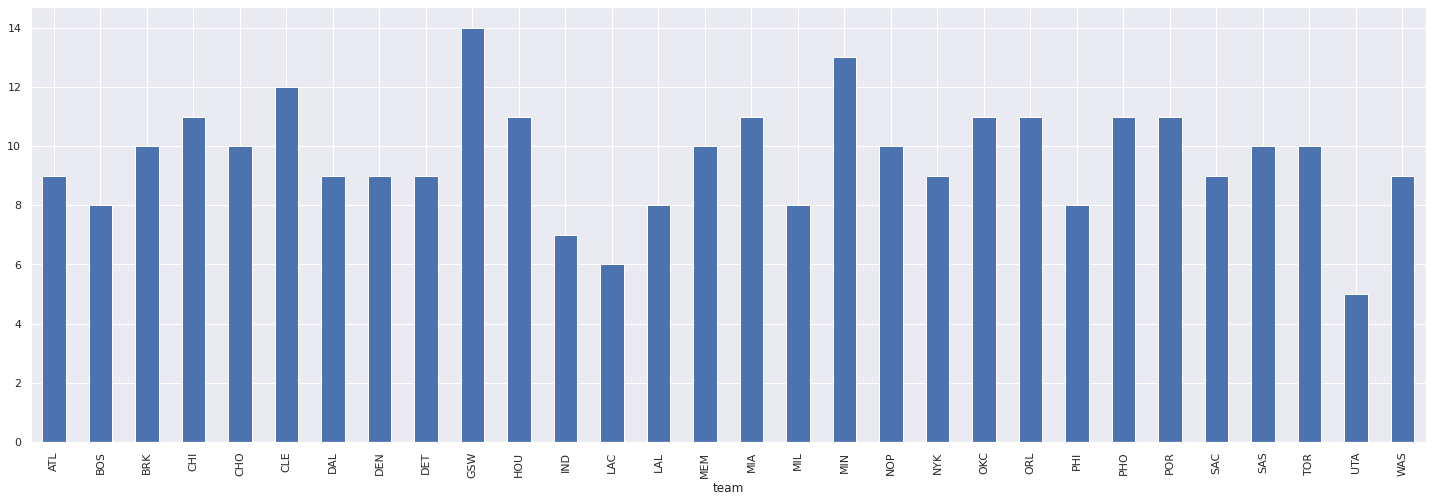

In [69]:
plt.figure(figsize=(25,8))
data.groupby(['team']).size().plot(kind='bar')

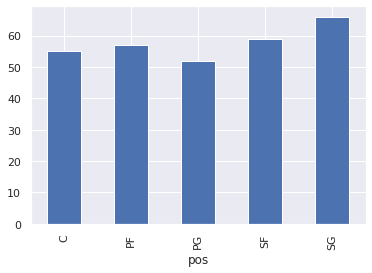

In [65]:
data.groupby(['pos']).size().plot(kind='bar')

In [70]:
data.head(5)

,team,salary,pos,age,g,gs,mp,fg,fga,fg%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,...,0.595,146,327,473,82,37,41,84,151,664
1,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,...,0.753,137,427,564,190,80,44,148,171,1068
2,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,...,0.873,73,185,258,42,14,47,44,78,607
3,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,...,0.865,32,190,222,100,46,18,43,96,733
4,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,...,0.708,192,410,602,92,44,75,94,97,904


In [73]:
var_ = [var for var in data.team]

In [74]:
lab = preprocessing.LabelEncoder()


In [75]:
data[['team','pos']] = data[['team','pos']].apply(lab.fit_transform)

In [76]:
data.head()

,team,salary,pos,age,g,gs,mp,fg,fga,fg%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,27,2711280.0,0,22,73,28,1725,265,603,0.439,...,0.595,146,327,473,82,37,41,84,151,664
1,15,28103550.0,0,24,56,56,1825,406,729,0.557,...,0.753,137,427,564,190,80,44,148,171,1068
2,2,2641691.0,0,36,47,12,1050,252,458,0.550,...,0.873,73,185,258,42,14,47,44,78,607
3,16,4054695.0,4,26,66,61,1805,255,569,0.448,...,0.865,32,190,222,100,46,18,43,96,733
4,5,20000000.0,0,23,56,56,1809,369,545,0.677,...,0.708,192,410,602,92,44,75,94,97,904


In [77]:
lab.classes_

array(['C', 'PF', 'PG', 'SF', 'SG'], dtype=object)

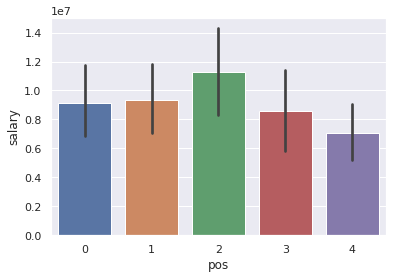

In [81]:
sns.barplot(x=data.pos, y=data.salary)

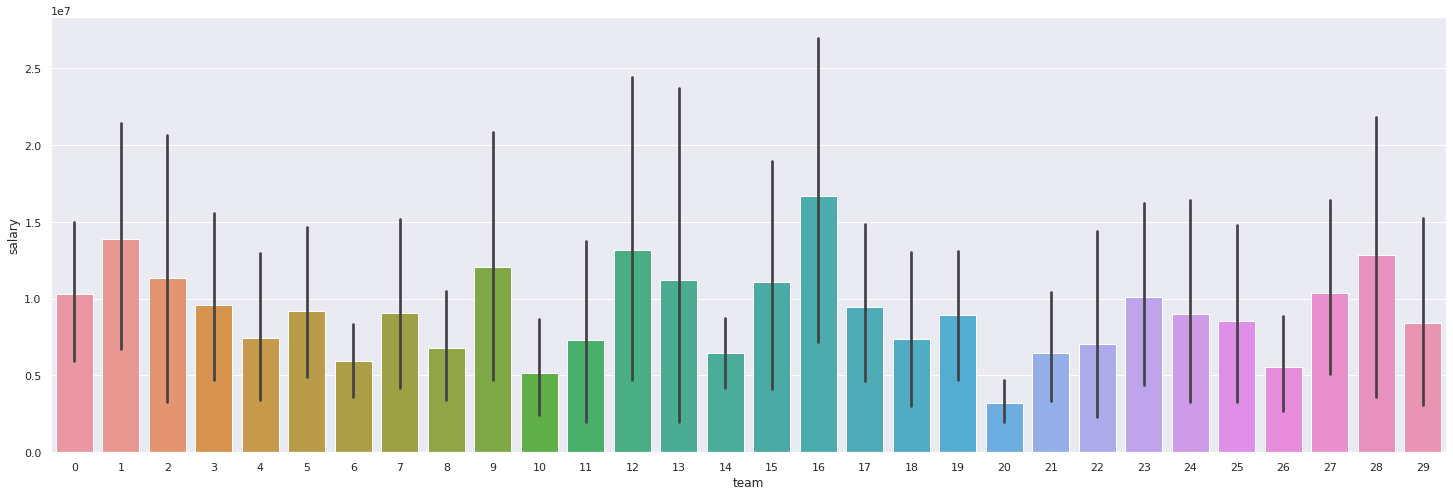

In [82]:
plt.figure(figsize=(25,8))
sns.barplot(x=data.team, y=data.salary)

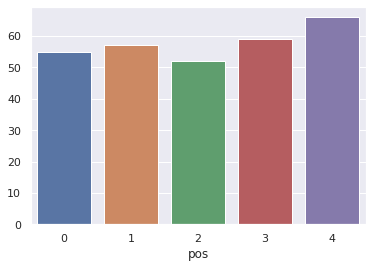

In [86]:
r1 = data.groupby('pos').size()
sns.barplot(x=r1.index, y=r1.values)

In [87]:
X = data.drop('salary', axis=1)
Y = data['salary']


In [93]:
X.shape, Y.shape

((289, 28), (289,))

In [99]:
Y

0       2711280.0
1      28103550.0
2       2641691.0
3       4054695.0
4      20000000.0
          ...    
284     2239200.0
285    13666667.0
286     8526316.0
287     1489065.0
288     2389641.0
Name: salary, Length: 289, dtype: float64

In [100]:
X

,team,pos,age,g,gs,mp,fg,fga,fg%,3p,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,27,0,22,73,28,1725,265,603,0.439,56,...,0.595,146,327,473,82,37,41,84,151,664
1,15,0,24,56,56,1825,406,729,0.557,0,...,0.753,137,427,564,190,80,44,148,171,1068
2,2,0,36,47,12,1050,252,458,0.550,14,...,0.873,73,185,258,42,14,47,44,78,607
3,16,4,26,66,61,1805,255,569,0.448,159,...,0.865,32,190,222,100,46,18,43,96,733
4,5,0,23,56,56,1809,369,545,0.677,1,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,5,3,25,50,0,459,37,98,0.378,21,...,0.833,21,68,89,34,14,3,16,47,110
285,10,0,26,68,67,2094,440,878,0.501,131,...,0.623,110,576,686,155,54,65,126,171,1218
286,0,4,29,77,8,1452,122,269,0.454,44,...,0.857,50,170,220,188,93,19,45,56,342
287,15,0,23,56,12,706,130,247,0.526,1,...,0.623,85,209,294,49,17,20,41,84,299


In [102]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=66)

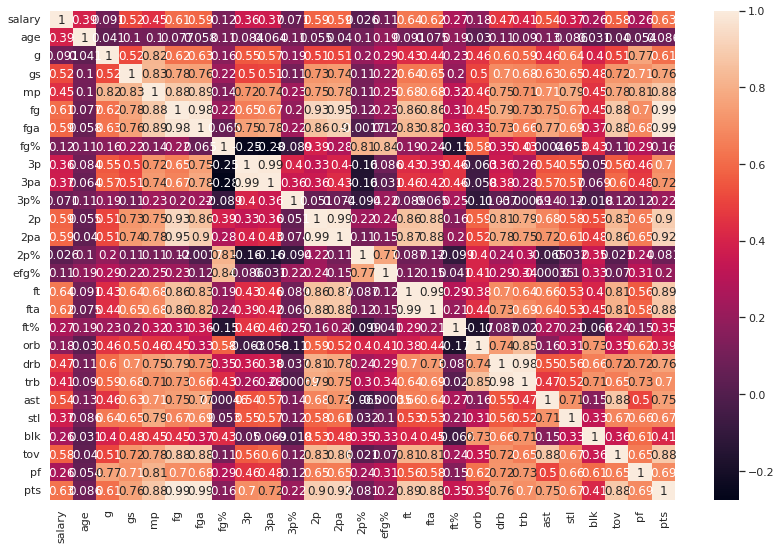

In [113]:

plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), annot=True)

In [119]:
def remove_symbols(x):
    if isinstance(x, str):
      return (x.replace('$','').replace(',',''))
    return x  

In [122]:
data['salary'] = data['salary'].apply(remove_symbols).astype('float')

In [123]:
data.head()

,team,salary,pos,age,g,gs,mp,fg,fga,fg%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,27,2711280.0,0,22,73,28,1725,265,603,0.439,...,0.595,146,327,473,82,37,41,84,151,664
1,15,28103550.0,0,24,56,56,1825,406,729,0.557,...,0.753,137,427,564,190,80,44,148,171,1068
2,2,2641691.0,0,36,47,12,1050,252,458,0.550,...,0.873,73,185,258,42,14,47,44,78,607
3,16,4054695.0,4,26,66,61,1805,255,569,0.448,...,0.865,32,190,222,100,46,18,43,96,733
4,5,20000000.0,0,23,56,56,1809,369,545,0.677,...,0.708,192,410,602,92,44,75,94,97,904


In [130]:
x_train.shape[1]

28

In [132]:
data.describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
team,289.0,1.433910e+01,8.538062e+00,0.0,7.0,15.0,22.0,29.0
salary,289.0,8.972877e+06,1.008679e+07,5318.0,2033160.0,4259259.0,12420000.0,45780966.0
pos,289.0,2.083045e+00,1.440976e+00,0.0,1.0,2.0,3.0,4.0
age,289.0,2.576817e+01,4.378557e+00,19.0,22.0,25.0,29.0,38.0
g,289.0,5.661938e+01,1.808104e+01,9.0,47.0,62.0,70.0,82.0


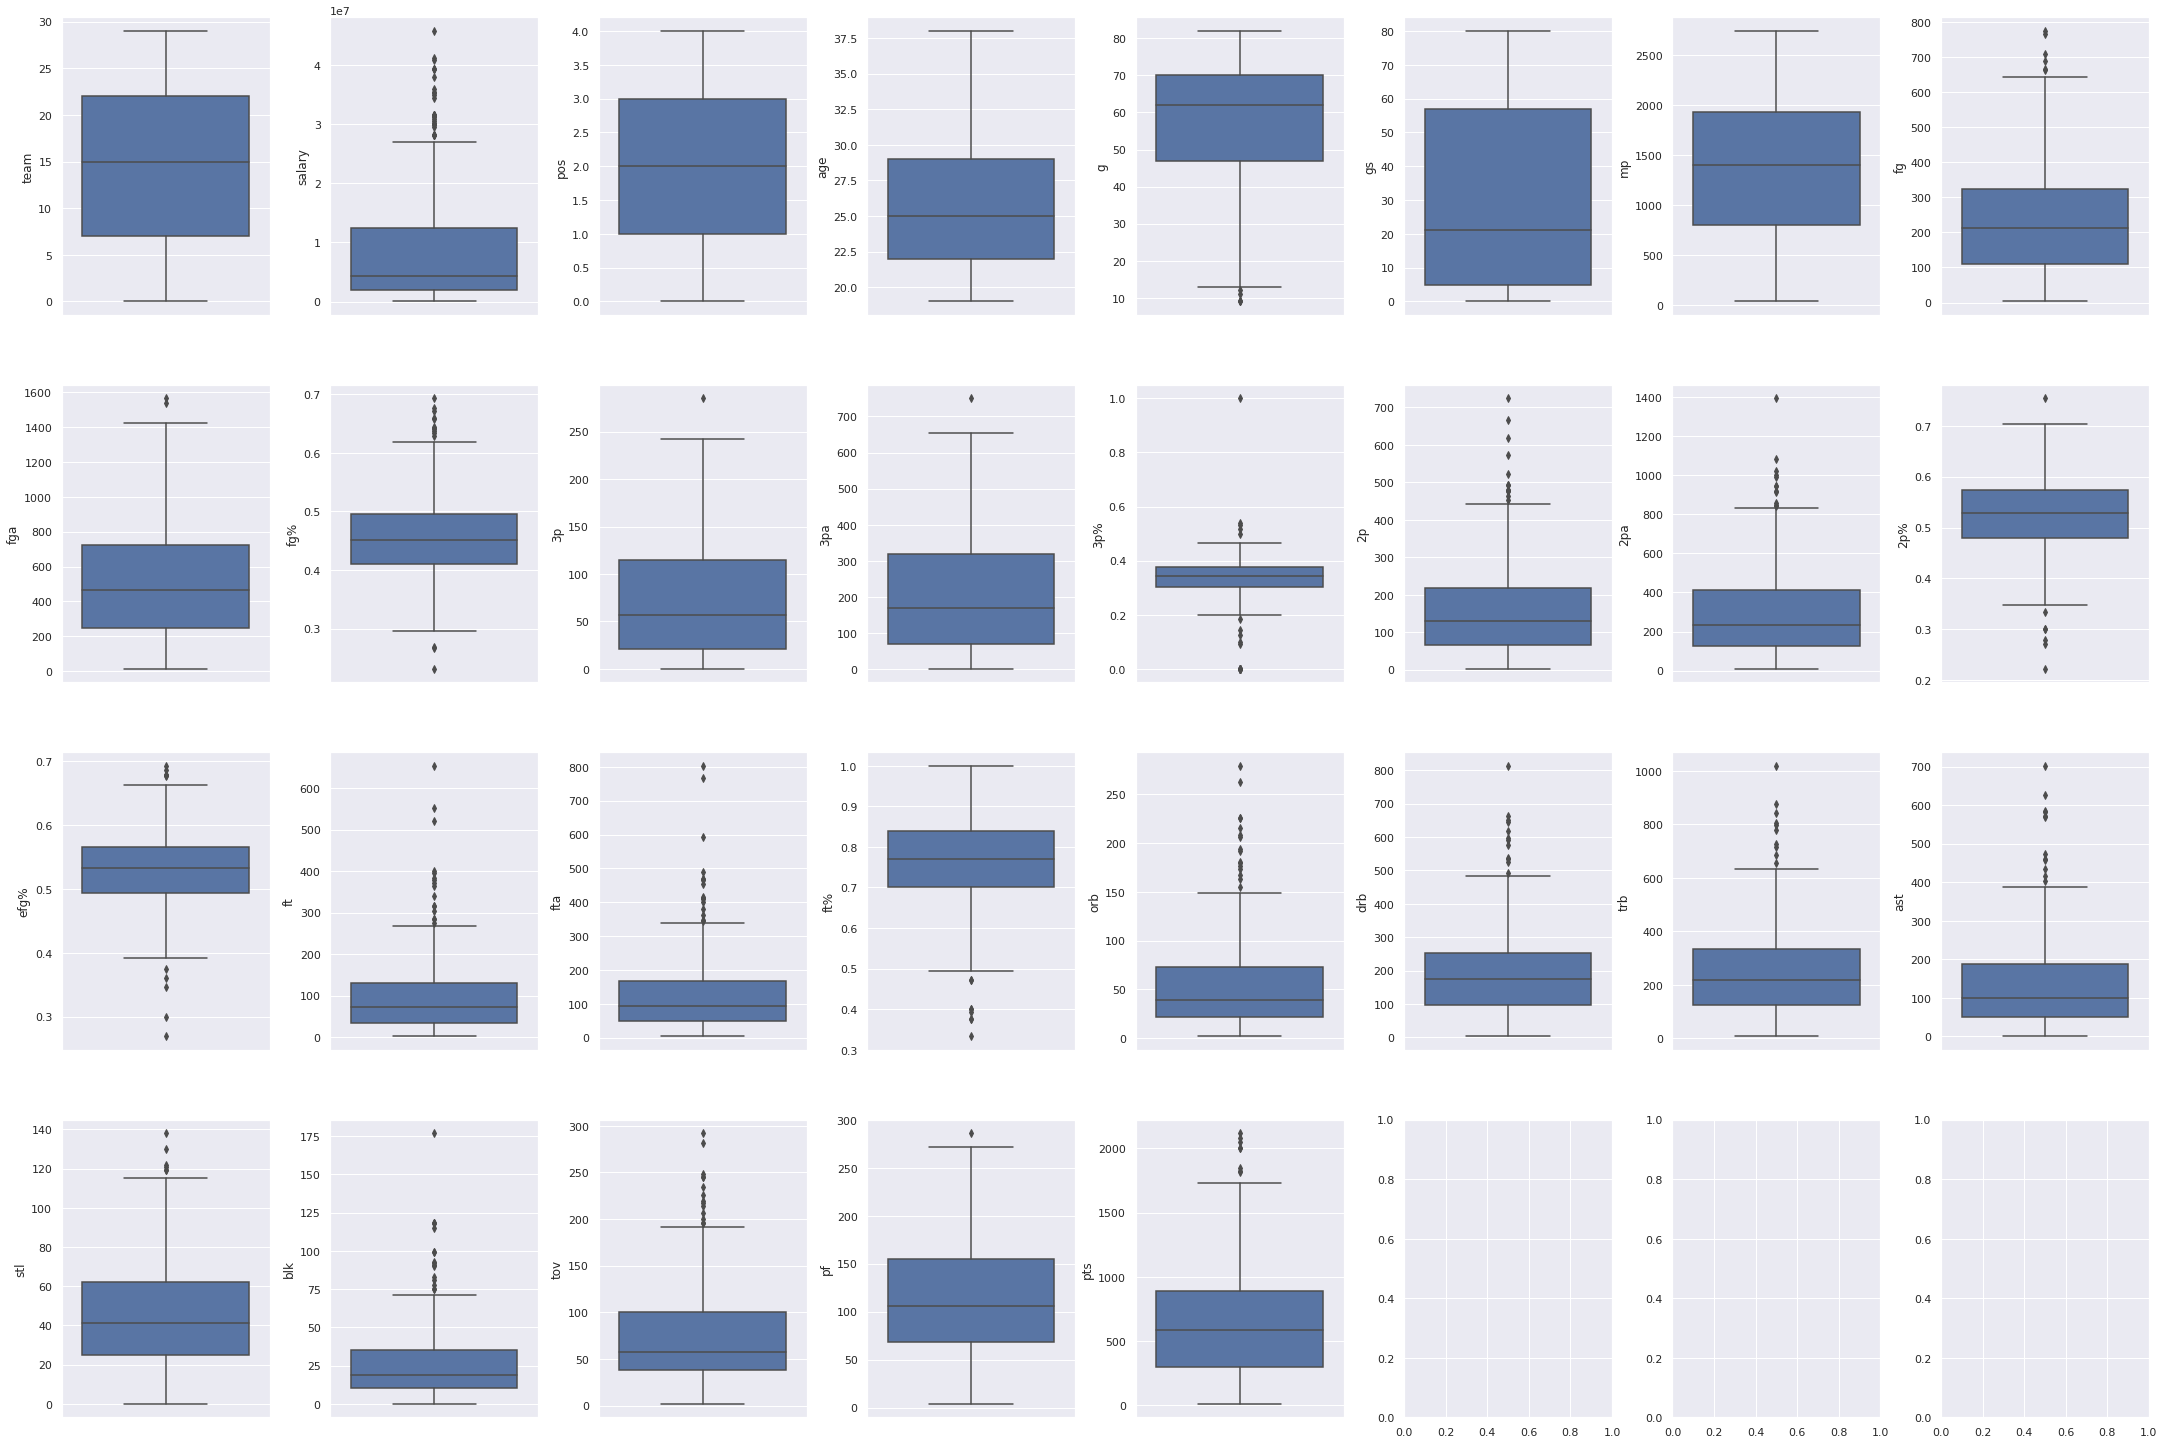

In [140]:
fig, axs = plt.subplots(ncols=8, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in data.items():
    # sns.boxplot(y=k, data=nba_data, ax=axs[index])
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

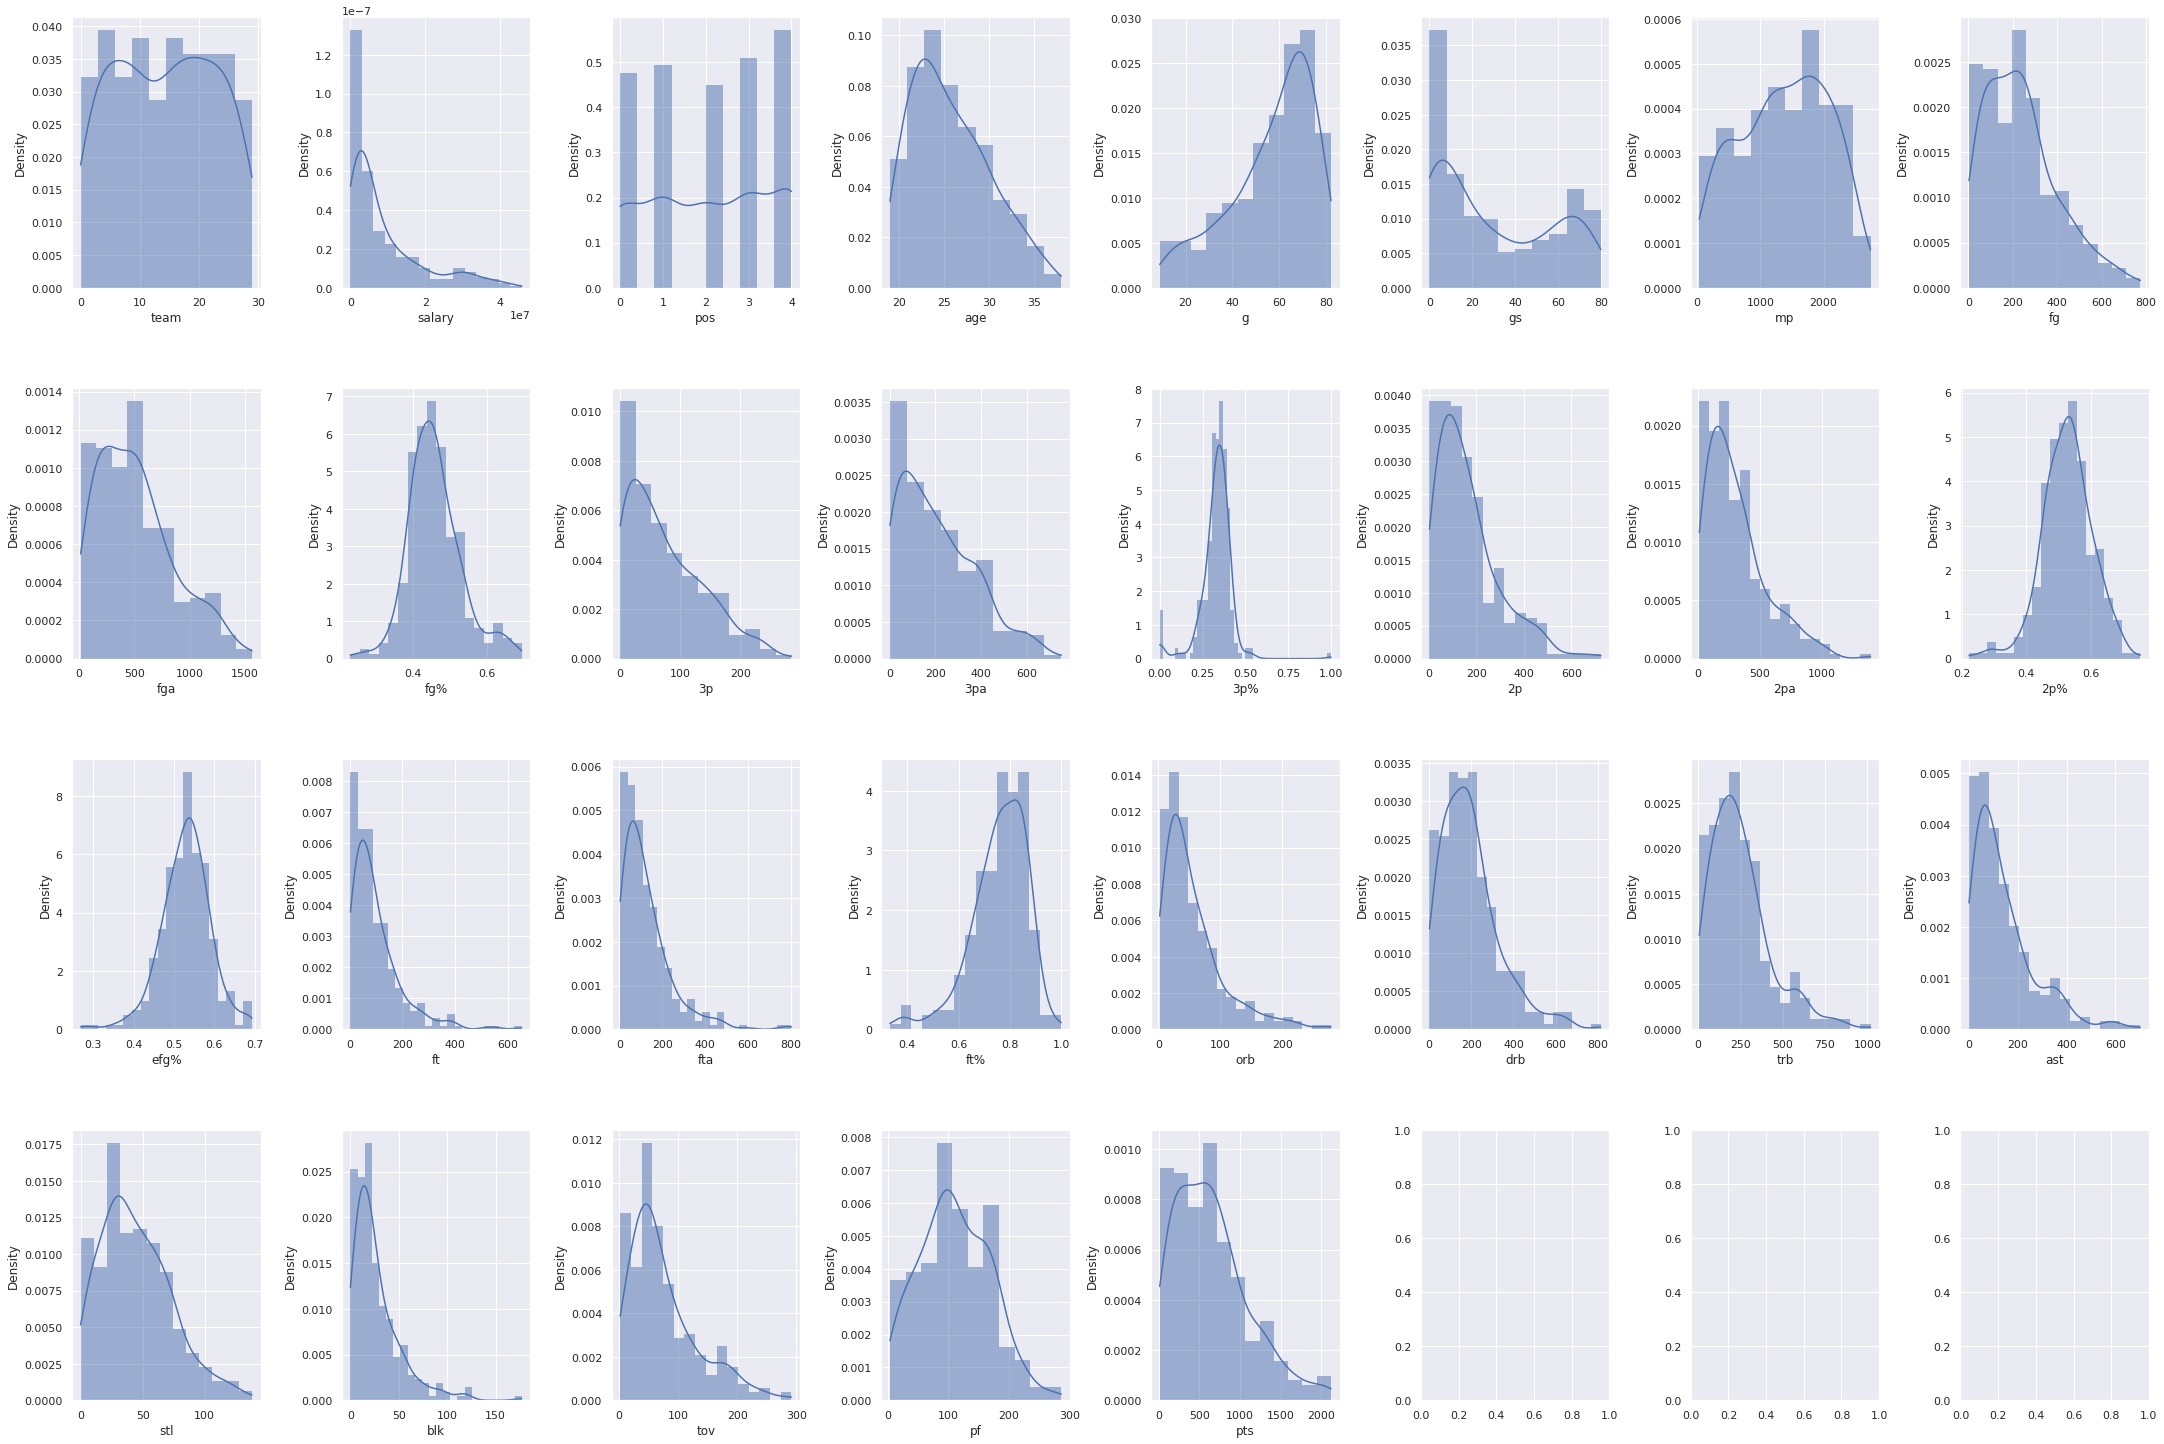

In [142]:
fig, axs = plt.subplots(ncols=8, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index], kde=True, stat="density", linewidth=0)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [143]:
for k, v in data.items():
        # Identify the 1st quartile
        q1 = v.quantile(0.25)
        # Identify the 3rd quartile
        q3 = v.quantile(0.75)
        # Get your interquartile range
        iqr = q3 - q1
        # Lower fence is q1 - (1.5 * iqr)
        # Upper fence is q3 + (1.5 * iqr)
        # Store outliers if they are above these fences
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        # Calculate the percentage of total outliers
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("%s Outliers = %.2f%%" % (k, perc))

team Outliers = 0.00%
salary Outliers = 9.69%
pos Outliers = 0.00%
age Outliers = 0.00%
g Outliers = 1.73%
gs Outliers = 0.00%
mp Outliers = 0.00%
fg Outliers = 2.08%
fga Outliers = 0.69%
fg% Outliers = 4.84%
3p Outliers = 0.35%
3pa Outliers = 0.35%
3p% Outliers = 6.57%
2p Outliers = 4.50%
2pa Outliers = 4.15%
2p% Outliers = 2.42%
efg% Outliers = 3.81%
ft Outliers = 5.54%
fta Outliers = 5.54%
ft% Outliers = 2.77%
orb Outliers = 5.54%
drb Outliers = 4.15%
trb Outliers = 3.46%
ast Outliers = 4.15%
stl Outliers = 2.08%
blk Outliers = 5.54%
tov Outliers = 4.84%
pf Outliers = 0.35%
pts Outliers = 2.77%


In [146]:
normalize_data = make_column_transformer(
    (preprocessing.MinMaxScaler(), ["fg", "ft", "fta", "tov", "pts"]))

In [147]:
xtrain_norm =  normalize_data.fit_transform(x_train)
xtest_norm =  normalize_data.fit_transform(x_test)

In [148]:
model = Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
    

])

In [149]:
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

In [155]:
model_fit = model.fit(x=xtrain_norm, y=y_train, epochs=100, verbose=0)

In [159]:
model.evaluate(xtrain_norm, y_train)

8/8 [==============================] - 0s 3ms/step - loss: 5429720.5000 - mae: 5429720.5000


[5429720.5, 5429720.5]

In [160]:
loss_, mae = model.evaluate(xtest_norm ,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 4452596.0000 - mae: 4452596.0000


In [161]:
loss_, mae

(4452596.0, 4452596.0)

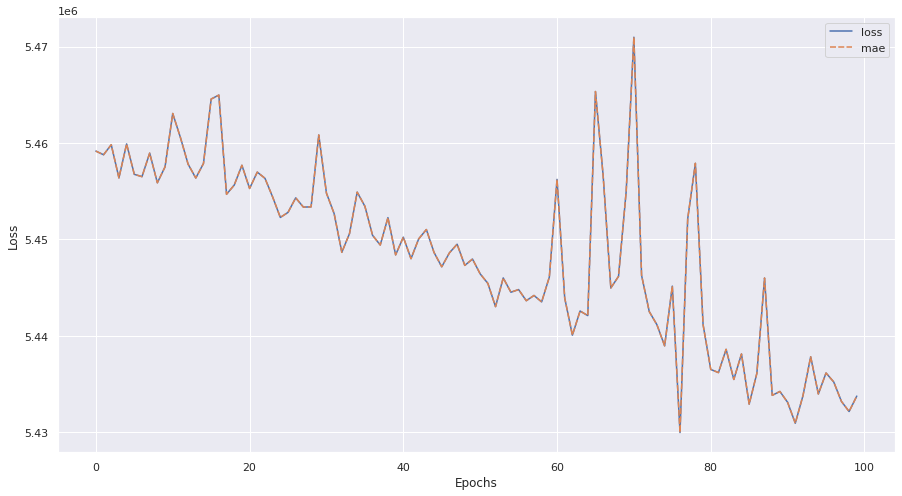

In [165]:
plt.figure(figsize=(15, 8))
plt.ylabel("Loss")
plt.xlabel("Epochs");
sns.lineplot(data=model_fit.history)

In [166]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               600       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
